## Método de Von-Neumann y el método de aceptación y rechazo
El método de aceptación y rechazo sirve para simular variables aleatorias de cualquier distribución. 
El método de Von-Neumann es un caso particular del método de aceptación y rechazo. A continuación se dará una breve explicación de como funciona. 

Supongamos que tenemos una variable aleatoria $X$ con función de densidad $f$ con soporte en $(a,b)$ tal que $f(x) \leq M$ para $a<x<b$. Además, supongamos que sabemos simular $U \sim unif(a,b)$. El algoritmo consiste en lo siguiente:
1. Generamos un valor de $U \sim unif(a,b)$.
2. Generamos $Y \sim unif(0,M)$.
3. Si $Y \leq f(U)$ aceptamos el valor de $U$ y lo tomamos como valor de $X$. En caso contrario se desecha el valor de $U$ y regresamos a 1.

El algoritmo anterior se basa en la siguiente proposición.

**Proposición**. Sean las variables aleatorias definidas anteriormente; $U | Y \leq f(U)$ tiene función de densidad $f(x)$.

**Ejemplo:**

Sea $f(x) = \begin{cases}
4x & 0 \leq x < \frac{1}{2} \\
4(1-x) & \frac{1}{2} \leq x<1 \\
0 & \text{en otro caso}
\end{cases}$, simulamos una variable aleatoria con esa distribución.

In [9]:
f <- function(x){ #Definimos la función de distribución
    if(0<=x & x<0.5){return(4*x)}
    if(0.5<=x & x<1){return(4*(1-x))}
    return(0)
}

Es evidente que $M=2$ acota a $f$. Generamos 200 muestras de $X$.

In [10]:
set.seed(1)
i <- 1
X <- c()
M <- 2
while(i<=10000){
    U <- runif(1) #paso 1
    Y <- runif(1, 0, M) #paso 2
    if(Y <= f(U)){ # paso 3: Rechazamos o aceptamos U
      X[i] <- U
      i <- i+1}
}

In [11]:
X[1:5]

[1] 0.2655087 0.6291140 0.2059746 0.6870228 0.6516738

Ahora graficamos un histograma para ver si $X$ en efecto tiene distribucion $f$. Graficamos $f$ para ver una mejor comparación.

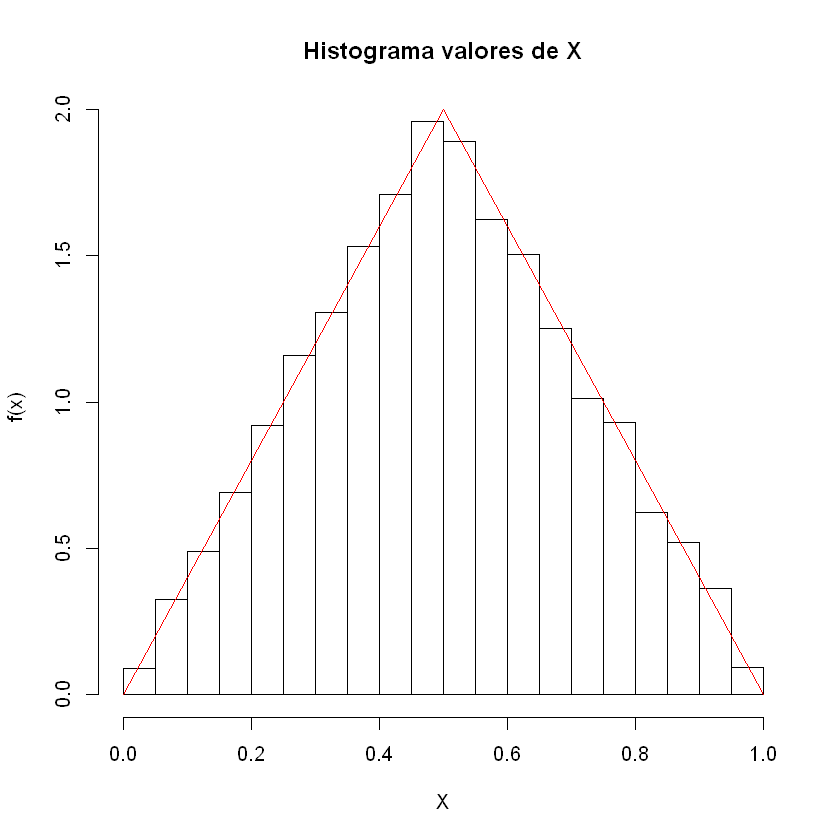

In [12]:
hist(X, freq = F,
    main = "Histograma valores de X",
    xlab = "X",
    ylab = "f(x)")
segments(x0 = c(0,0.5), y0 = c(0,2), x1 = c(0.5,1), y1 = c(2,0), col='red')


Ahora bien, veamos la generalización del método anterior. A continuación se presenta el método de aceptación y rechazo.

Sea $X$ una variable aleatoria con pivote en $ - \infty \leq a < b \leq + \infty$, con distribución $f$, donde $f$ no es necesariamente acotada. Sea $Z$ una v.a. con densidad $g$ con pivote en $(a,b)$ y que podemos simular facilmente. Y supongamos que existe $c>0$ tal que $f(x) \leq c\cdot g(x)$. Para cualquier $x$ en el soporte de $f$. El algoritmo de aceptación y rechazo se basa es el siguiente:
1. Generar un valor de $Z$.
2. Generar $Y \sim unif(0, c\cdot g(Z))$.
3. Si $Y \leq f(Z)$ tomamos el valor de $Z$ como muestra de $X$. En caso contrario rechazamos el valor y repetimos desde 1.

El algoritmo anterior esta justificado por la siguiente proposición.

**Proposición**. Bajo las suposiciones y variables aleatorias anteriores se tiene que $Z | Y \leq f(Z)$ tiene función de densidad $f$.

**Ejemplo:** 

Generemos muestras de una variable aleatoria normal estándar $X$, la variable aleatoria auxiliar $Z$ puede ser una que se distribuya $exp(1)$, ya que esta es fácil de generar. Sea $U$ una v.a. uniforme, entonces $Z = -ln(U)$ se distribuye $exp(1)$. Como el pivote de $X$ es $\mathbb{R}$ entonces primero generaremos $|X|$ con el método de aceptación y rechazo, ya que esta última v.a. tiene un pivote que coincide con el de $Z$, y por un resultado de probabilidad sabemos que $S \cdot |X|$ se distribuye $N(0,1)$ donde $S = \begin{cases}
1 & \text{con prob. } \frac{1}{2}\\
-1 & \text{con prob. }\frac{1}{2}
\end{cases}$.
De esto últimos podemos obtener valores de $X$ a partir de  valores de $|X|$. Asimismo, la funcion de densidad de $|X|$ es $f(x) = \sqrt{\frac{2}{\pi}} \exp\{\frac{-x^2}{2}\}$.
Sea $c=\sqrt{\dfrac{2e}{\pi}}$, se puede verificar que esta $c$ cumple con la $c$ de la proposición.


In [17]:
f1 <- function(x){ #
    sqrt(2/pi)*exp(-x^2/2)
}

In [18]:
i <- 1
X <- c()
c <- sqrt(2*exp(1)/pi)
while(i<=1000){
    Z <- -log(runif(1), base = exp(1)) #paso 1
    Y <- runif(1, 0, c*exp(-Z)) #paso 2
    if(Y <= f1(Z)){ # paso 3: Rechazamos o aceptamos U
      X[i] <- Z
      i <- i+1}
} #Con esto ya generamos los valores de |X|, falta multiplicar por los valores de S


In [19]:
S <- 2*c(runif(10000)<0.5)-1 #Simulamos S
X <- S*X #De esta forma ya obtenemos valores de X~N(0,1)

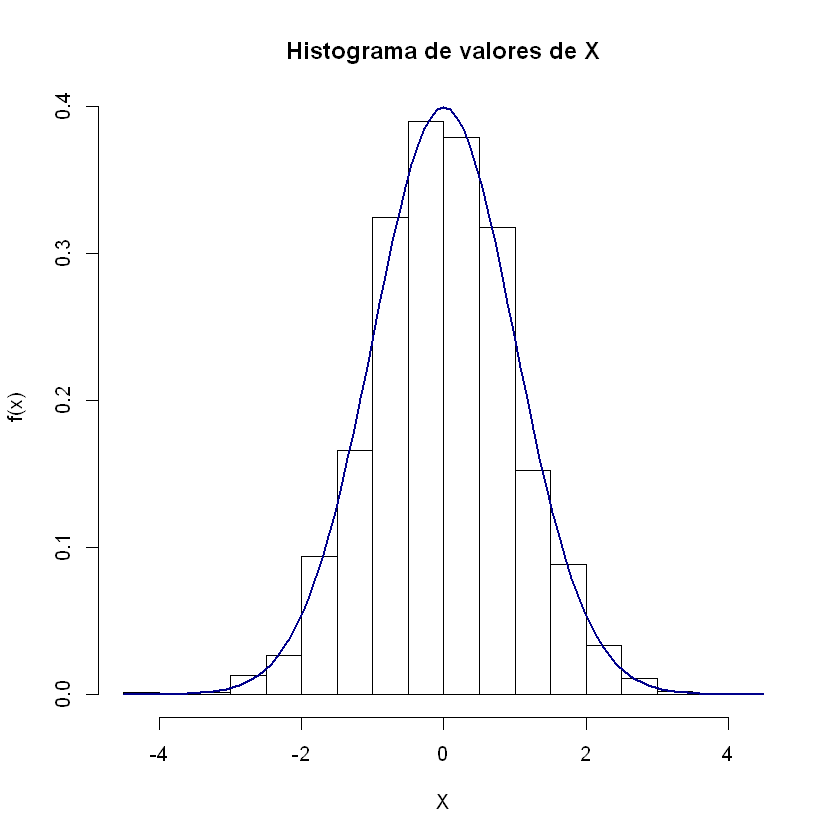

In [20]:
hist(X, freq=F, main = "Histograma de valores de X", xlab="X",ylab="f(x)")
curve(dnorm(x), col="darkblue", lwd=2, add=TRUE, yaxt="n")